In [60]:
#2.1
#Task 1
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from einops import rearrange

In [48]:
# Download the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

In [49]:
# Create a subset of the dataset containing 1,000 samples
subset_indices = torch.randperm(len(train_dataset))[:1000]
subset_dataset = torch.utils.data.Subset(train_dataset, subset_indices)

In [50]:
print(subset_dataset)

In [51]:
# Print the size of the subset dataset
print(len(subset_dataset))

1000


In [52]:
sample_image, sample_label = subset_dataset[0]
print(sample_image.size())
print(sample_label)

torch.Size([1, 28, 28])
6


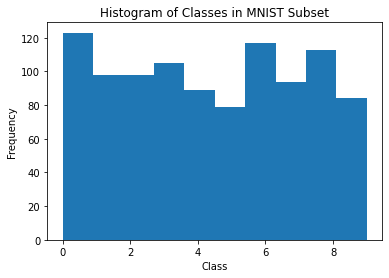

In [53]:
#Task 2
# Plot a histogram of classes in the subset dataset
labels = [subset_dataset[i][1] for i in range(len(subset_dataset))]
plt.hist(labels, bins=10)
plt.title("Histogram of Classes in MNIST Subset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [54]:
#Task 3
batch_size = 25
data_loader = torch.utils.data.DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)
for i, batch in enumerate(data_loader):
    # Batch the subset dataset into batches of 25 samples each
    batch = rearrange(batch[0], 'b c h w -> b (h w) c')
    
    # Print the shape of the batch
    print(f"Batch {i+1} shape:", batch.shape)

Batch 1 shape: torch.Size([25, 784, 1])
Batch 2 shape: torch.Size([25, 784, 1])
Batch 3 shape: torch.Size([25, 784, 1])
Batch 4 shape: torch.Size([25, 784, 1])
Batch 5 shape: torch.Size([25, 784, 1])
Batch 6 shape: torch.Size([25, 784, 1])
Batch 7 shape: torch.Size([25, 784, 1])
Batch 8 shape: torch.Size([25, 784, 1])
Batch 9 shape: torch.Size([25, 784, 1])
Batch 10 shape: torch.Size([25, 784, 1])
Batch 11 shape: torch.Size([25, 784, 1])
Batch 12 shape: torch.Size([25, 784, 1])
Batch 13 shape: torch.Size([25, 784, 1])
Batch 14 shape: torch.Size([25, 784, 1])
Batch 15 shape: torch.Size([25, 784, 1])
Batch 16 shape: torch.Size([25, 784, 1])
Batch 17 shape: torch.Size([25, 784, 1])
Batch 18 shape: torch.Size([25, 784, 1])
Batch 19 shape: torch.Size([25, 784, 1])
Batch 20 shape: torch.Size([25, 784, 1])
Batch 21 shape: torch.Size([25, 784, 1])
Batch 22 shape: torch.Size([25, 784, 1])
Batch 23 shape: torch.Size([25, 784, 1])
Batch 24 shape: torch.Size([25, 784, 1])
Batch 25 shape: torch.Siz

/home/exouser/.conda/envs/me592/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


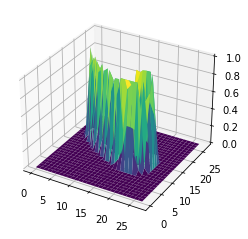

In [61]:
#Task 4
sample = subset_dataset[0][0]
x, y = torch.meshgrid(torch.arange(sample.shape[1]), torch.arange(sample.shape[2]))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, sample.squeeze(), cmap='viridis')
plt.show()

In [72]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: /home/exouser/.conda/envs/me592/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('energydata_complete.csv', parse_dates=['date'])

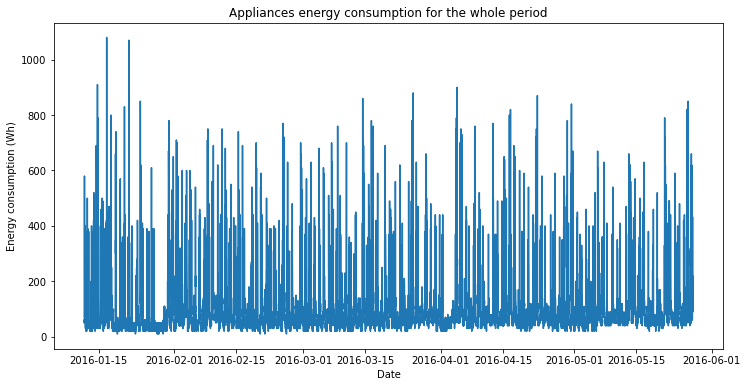

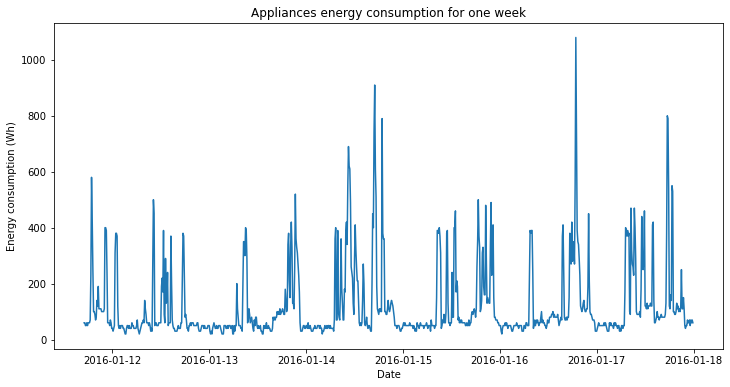

In [74]:
# Plot the appliances energy consumption for the whole period and a closer look at any one week of consumption
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['Appliances'])
plt.xlabel('Date')
plt.ylabel('Energy consumption (Wh)')
plt.title('Appliances energy consumption for the whole period')
plt.show()

plt.figure(figsize=(12, 6))
one_week = data[(data['date'] >= '2016-01-11') & (data['date'] < '2016-01-18')]
plt.plot(one_week['date'], one_week['Appliances'])
plt.xlabel('Date')
plt.ylabel('Energy consumption (Wh)')
plt.title('Appliances energy consumption for one week')
plt.show()

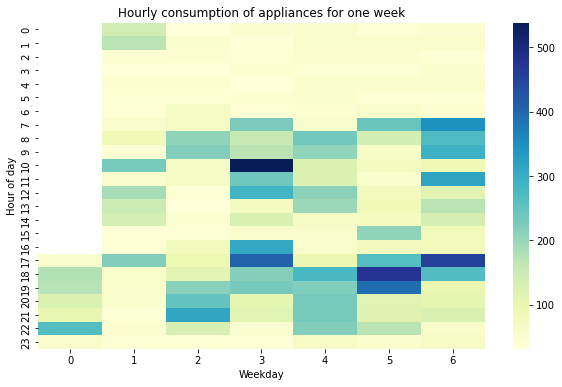

In [75]:
# Plot heatmap of hourly consumption of appliances for a week
one_week_hourly = one_week.pivot_table(index=one_week['date'].dt.hour, columns=one_week['date'].dt.weekday, values='Appliances', aggfunc=np.mean)
plt.figure(figsize=(10, 6))
sns.heatmap(one_week_hourly, cmap='YlGnBu')
plt.xlabel('Weekday')
plt.ylabel('Hour of day')
plt.title('Hourly consumption of appliances for one week')
plt.show()

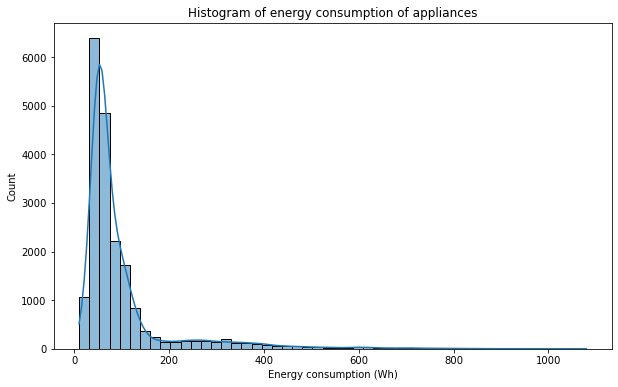

In [76]:
# Plot the histogram of energy consumption of appliances
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Appliances', bins=50, kde=True)
plt.xlabel('Energy consumption (Wh)')
plt.title('Histogram of energy consumption of appliances')
plt.show()

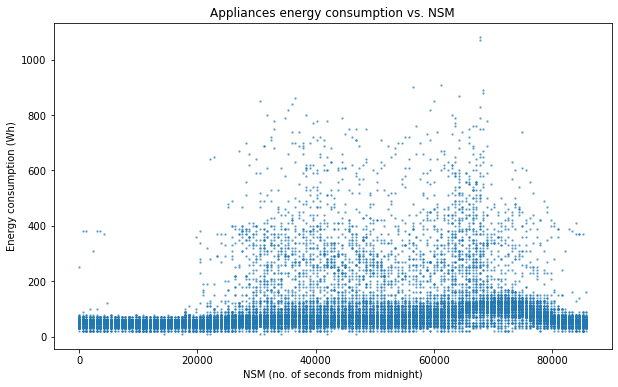

In [77]:
# Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM
data['NSM'] = (data['date'].dt.hour * 3600) + (data['date'].dt.minute * 60) + data['date'].dt.second
plt.figure(figsize=(10, 6))
plt.scatter(data['NSM'], data['Appliances'], s=2, alpha=0.5)
plt.xlabel('NSM (no. of seconds from midnight)')
plt.ylabel('Energy consumption (Wh)')
plt.title('Appliances energy consumption vs. NSM')
plt.show()

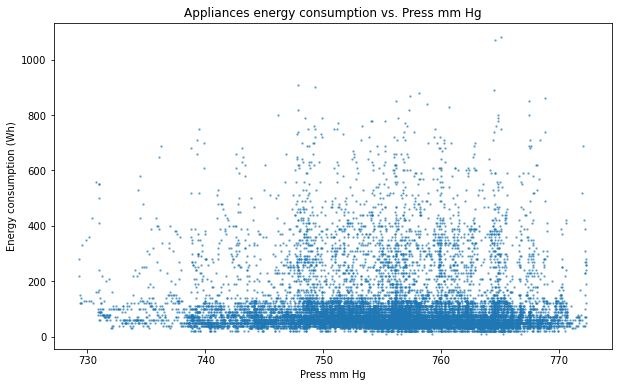

In [78]:
# Plot appliances energy consumption vs. Press mm Hg
plt.figure(figsize=(10, 6))
plt.scatter(data['Press_mm_hg'], data['Appliances'], s=2, alpha=0.5)
plt.xlabel('Press mm Hg')
plt.ylabel('Energy consumption (Wh)')
plt.title('Appliances energy consumption vs. Press mm Hg')
plt.show()

In [79]:
import pandas as pd
from scipy.stats import kurtosis, skew

# Load the data
df = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
df.columns = ['Frequency (Hz)', 'Angle of attack (degrees)', 'Chord length (m)', 
              'Free-stream velocity (m/s)', 'Suction side displacement thickness (m)',
              'Scaled sound pressure level (dB)']

# Compute mean, variance, median, and range
mean = df.mean()
variance = df.var()
median = df.median()
range_ = df.max() - df.min()

# Compute kurtosis and skewness using scipy.stats functions
kurt = kurtosis(df)
skewness = skew(df)

# Print the results
print("Mean:\n", mean)
print("\nVariance:\n", variance)
print("\nMedian:\n", median)
print("\nKurtosis:\n", kurt)
print("\nSkewness:\n", skewness)
print("\nRange:\n", range_)

Mean:
 Frequency (Hz)                             2886.380572
Angle of attack (degrees)                     6.782302
Chord length (m)                              0.136548
Free-stream velocity (m/s)                   50.860745
Suction side displacement thickness (m)       0.011140
Scaled sound pressure level (dB)            124.835943
dtype: float64

Variance:
 Frequency (Hz)                             9.938717e+06
Angle of attack (degrees)                  3.502424e+01
Chord length (m)                           8.749868e-03
Free-stream velocity (m/s)                 2.425116e+02
Suction side displacement thickness (m)    1.729287e-04
Scaled sound pressure level (dB)           4.759146e+01
dtype: float64

Median:
 Frequency (Hz)                             1600.000000
Angle of attack (degrees)                     5.400000
Chord length (m)                              0.101600
Free-stream velocity (m/s)                   39.600000
Suction side displacement thickness (m)       0.004957
